# 查看数据基本信息、使用textrank进行关键词提取、词云图可视化

## 导入必要的包

In [1]:
import pandas as pd
import jieba.analyse
import jieba.posseg as psg
from os import path
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import jieba.analyse
import pandas as pd

## 读取数据与数据基础信息查看

In [2]:
raw_df = pd.read_csv(r'rawdata_reprocessed.csv')

In [3]:
raw_df.head()

,weibo_username,weibo_verification,weibo_content,weibo_content_preprocessed,submit_time,forward_counts,comments_counts,points_times
0,辣子鸡谁做的好吃,NaN,好像可以在自己幻想的元宇宙里过一辈子好像已经过完了一辈子双鱼座的脑子要不得,好像 幻想 元宇宙 里 一辈子 好像 完 一辈子 双鱼座 脑子 要不得,01月10日 23:59,0,0,0
1,远古的刀,NaN,反正闭关锁宇宙我们将会面临下一次的闭关锁国融入不了全球经济王峻涛跟你们讲我相信这个元宇宙真的...,反正 闭关 锁 宇宙 将会 面临 闭关锁国 融入 全球 经济 王峻涛 讲 元宇宙 真的 一下...,01月10日 23:58,32,3,0
2,暮景烟_深浅,NaN,周深先生之夜元宇宙周深拥有了生米就像拥有了梦的翅膀卡布叻周深放心飞吧生米永相随时尚先生元宇宙...,周深 之夜 元宇宙 周深 拥有 生米 拥有 梦 翅膀 卡布 叻 周深 放心 飞 生米 永 相...,01月10日 23:58,0,0,0
3,东辉毅恒传媒,NaN,王峻涛其实吧你有空可以再看看这个视频跟你们讲我相信这个元宇宙真的会来虽然不是一下子就到来还需...,王峻涛 有空 视频 讲 元宇宙 真的 一下子 到来 技术 突破 社会 讲 玩 后果 人会 分...,01月10日 23:57,0,0,0
4,在寒蝉鸣泣中等待夏日重现,NaN,敬元宇宙让基尔希斯坦的女朋友的微博视频,敬 元宇宙 基尔 希斯 坦 女朋友 微博 视频,01月10日 23:57,0,0,5


### 导出微博内容用于BTM聚类分析

In [5]:
raw_df['weibo_content_preprocessed'].to_csv('weibo_content_preprocessed.txt',header=None,index=None)

### 数据量大电脑配置不行导致程序经常崩溃，所以采样20000条进行分析

In [6]:
raw_df['weibo_content_preprocessed'].sample(20000).to_csv('weibo_content_preprocessed_20000sample.txt',header=None,index=None)

### 查看各种认证信息的数量

In [4]:
raw_df['weibo_verification'].value_counts(dropna=False)

NaN       87597
微博个人认证    33489
微博官方认证    11118
Name: weibo_verification, dtype: int64

### 查看转评赞数据平均值

In [5]:
print(raw_df['forward_counts'].mean())
print(raw_df['comments_counts'].mean())
print(raw_df['points_times'].mean())

15.12959517109921
9.262329430274425
14722.48153611086


## 使用jieba.textrank进行关键词提取

### 加载用户词典

In [6]:
jieba.load_userdict('userdic.txt')

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\25795\AppData\Local\Temp\jieba.cache
Loading model cost 0.863 seconds.
Prefix dict has been built successfully.


In [7]:
jieba.add_word('元宇宙')

### 进行关键词提取并查看

In [8]:
text = ' '.join(map(str,raw_df['weibo_content_preprocessed'].values))

keywords = jieba.analyse.textrank(text,topK=50,withWeight=True,allowPOS=['a','d','n','ns','nr','x','vn'])

In [9]:
print(keywords)

[('元宇宙', 1.0), ('数字', 0.17124186487688306), ('板块', 0.12655198908970852), ('公司', 0.12143604437289619), ('科技', 0.11711449316867813), ('宇宙', 0.11168316843637238), ('游戏', 0.11167033329905332), ('世界', 0.10852528749451718), ('市场', 0.10625178295237088), ('概念', 0.10585377096590465), ('股份', 0.10217423516337541), ('技术', 0.09635749128561137), ('链接', 0.08799507105575208), ('发展', 0.08378682618721717), ('中国', 0.07648853917732781), ('网页', 0.07509794886409835), ('平台', 0.06775042538561524), ('区块', 0.0656150754655005), ('投资', 0.06306128466289182), ('行业', 0.05942135611133051), ('项目', 0.0591643572102727), ('视频', 0.05262038179690696), ('经济', 0.050925033563070814), ('货币', 0.04719321421580891), ('现实', 0.0461948187018246), ('互联网', 0.045610263540478854), ('藏品', 0.04502954254657213), ('全球', 0.04331268749533565), ('资金', 0.043108810088672865), ('人类', 0.0424905282021997), ('机会', 0.042480916474729034), ('产品', 0.041969518385569386), ('社区', 0.04073608342143041), ('领域', 0.040233735322282076), ('真的', 0.0401905150603253

### 词云图可视化

In [10]:
words_frequence = {x[0]:x[1] for x in keywords}
words_frequence

{'元宇宙': 1.0,
 '数字': 0.17124186487688306,
 '板块': 0.12655198908970852,
 '公司': 0.12143604437289619,
 '科技': 0.11711449316867813,
 '宇宙': 0.11168316843637238,
 '游戏': 0.11167033329905332,
 '世界': 0.10852528749451718,
 '市场': 0.10625178295237088,
 '概念': 0.10585377096590465,
 '股份': 0.10217423516337541,
 '技术': 0.09635749128561137,
 '链接': 0.08799507105575208,
 '发展': 0.08378682618721717,
 '中国': 0.07648853917732781,
 '网页': 0.07509794886409835,
 '平台': 0.06775042538561524,
 '区块': 0.0656150754655005,
 '投资': 0.06306128466289182,
 '行业': 0.05942135611133051,
 '项目': 0.0591643572102727,
 '视频': 0.05262038179690696,
 '经济': 0.050925033563070814,
 '货币': 0.04719321421580891,
 '现实': 0.0461948187018246,
 '互联网': 0.045610263540478854,
 '藏品': 0.04502954254657213,
 '全球': 0.04331268749533565,
 '资金': 0.043108810088672865,
 '人类': 0.0424905282021997,
 '机会': 0.042480916474729034,
 '产品': 0.041969518385569386,
 '社区': 0.04073608342143041,
 '领域': 0.040233735322282076,
 '真的': 0.04019051506032536,
 '时代': 0.039913094842451806,
 '方

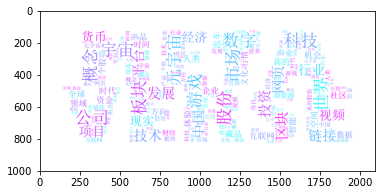

In [27]:

backgroud_Image=plt.imread(r'./METAVERSE3.jpg')
# 若是有中文的话，font_path ='simsun.ttc'必须添加，不然会出现方框，不出现汉字
# simsun.ttc为汉字编码文件，可以从本地windows系统找一个汉字编码文件上传， 如C:\\Windows\Fonts下有许多汉字编码文件
wordcloud = WordCloud(font_path ='simsun.ttc',repeat=True,mask=backgroud_Image,background_color='white',width=2000,height=1000,colormap='cool')
wordcloud = wordcloud.fit_words(words_frequence)
wordcloud.to_file('wordcloud_textrank.png')
plt.imshow(wordcloud)

### 保存提取的关键词

In [12]:
def save_dic(dic,path):
    '''
    将字典输出到指定目录下的文件中
    若文件不存在则会自动创建
    :param dic: 需要输出的字典
    :param path: 输出路径
    :return: 无
    '''
    with open(path,'w') as out_file:
        for key in dic.keys():
            out_file.write("{}:{}\n".format(key, dic.get(key)))
        out_file.flush()
        out_file.close()

In [13]:
save_dic(words_frequence,'keywords.txt')